C:\Users\Prakruthi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


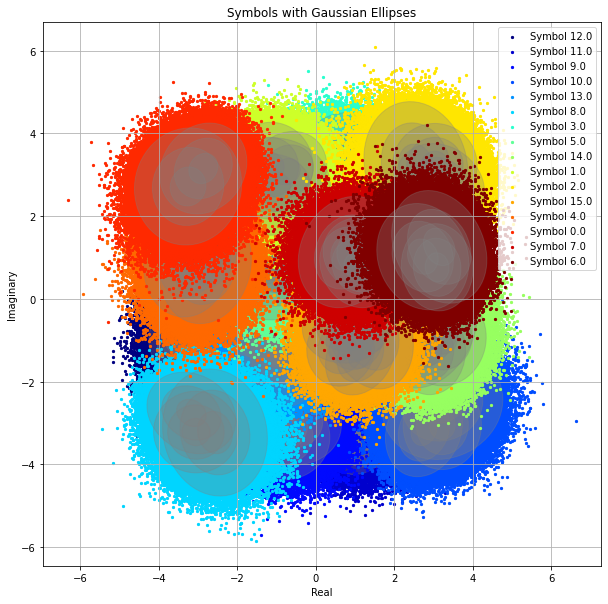

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Load all parquet files from the folder into a single dataframe
def load_data_from_folder(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]
    dataframes = [pd.read_parquet(os.path.join(folder_path, f)) for f in files]
    return pd.concat(dataframes, ignore_index=True)

# Function to draw the ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

# Load data
df = load_data_from_folder("C:/Users/Prakruthi/Documents/Dissertation/DATASET/no_neighbors_datasets")

# Plotting
plt.figure(figsize=(10, 10))
unique_labels = df['point_label'].unique()
data_colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for idx, label in enumerate(unique_labels):
    symbol_data = df[df['point_label'] == label][['point_x_shifted_real', 'point_x_shifted_imag']].values
    
    n_components = np.arange(1, 6)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(symbol_data)
              for n in n_components]
    bic = [model.bic(symbol_data) for model in models]
    best_gmm = models[np.argmin(bic)]
    
    plt.scatter(symbol_data[:, 0], symbol_data[:, 1], color=data_colors[idx], s=5, label=f'Symbol {label}')
    
    for mean, covar in zip(best_gmm.means_, best_gmm.covariances_):
        draw_ellipse(mean, covar, alpha=0.3, color='gray')

plt.title('Symbols with Gaussian Ellipses')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 720x720 with 0 Axes>

C:\Users\Prakruthi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


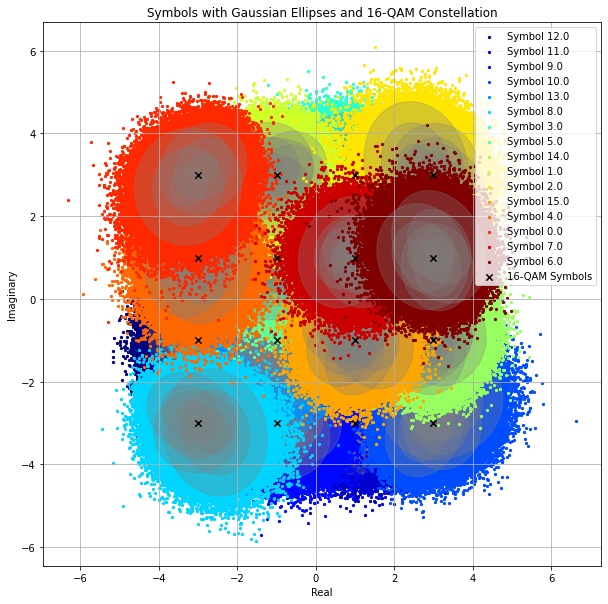

In [3]:

# Function to generate 16-QAM constellation
def generate_16QAM_constellation():
    levels = [-3, -1, 1, 3]
    constellation = []
    for real_part in levels:
        for imag_part in levels:
            constellation.append((real_part, imag_part))
    return np.array(constellation)

# Load data
df = load_data_from_folder("C:/Users/Prakruthi/Documents/Dissertation/DATASET/no_neighbors_datasets")

# Plotting
plt.figure(figsize=(10, 10))
unique_labels = df['point_label'].unique()
data_colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for idx, label in enumerate(unique_labels):
    symbol_data = df[df['point_label'] == label][['point_x_shifted_real', 'point_x_shifted_imag']].values
    
# Plotting
plt.figure(figsize=(10, 10))
unique_labels = df['point_label'].unique()
data_colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for idx, label in enumerate(unique_labels):
    symbol_data = df[df['point_label'] == label][['point_x_shifted_real', 'point_x_shifted_imag']].values
    
    n_components = np.arange(1, 6)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(symbol_data)
              for n in n_components]
    bic = [model.bic(symbol_data) for model in models]
    best_gmm = models[np.argmin(bic)]
    
    plt.scatter(symbol_data[:, 0], symbol_data[:, 1], color=data_colors[idx], s=5, label=f'Symbol {label}')
    
    for mean, covar in zip(best_gmm.means_, best_gmm.covariances_):
        draw_ellipse(mean, covar, alpha=0.3, color='gray')
# Plot 16-QAM constellation
qam_constellation = generate_16QAM_constellation()
plt.scatter(qam_constellation[:, 0], qam_constellation[:, 1], color='black', s=40, marker='x', label='16-QAM Symbols')

plt.title('Symbols with Gaussian Ellipses and 16-QAM Constellation')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.show()

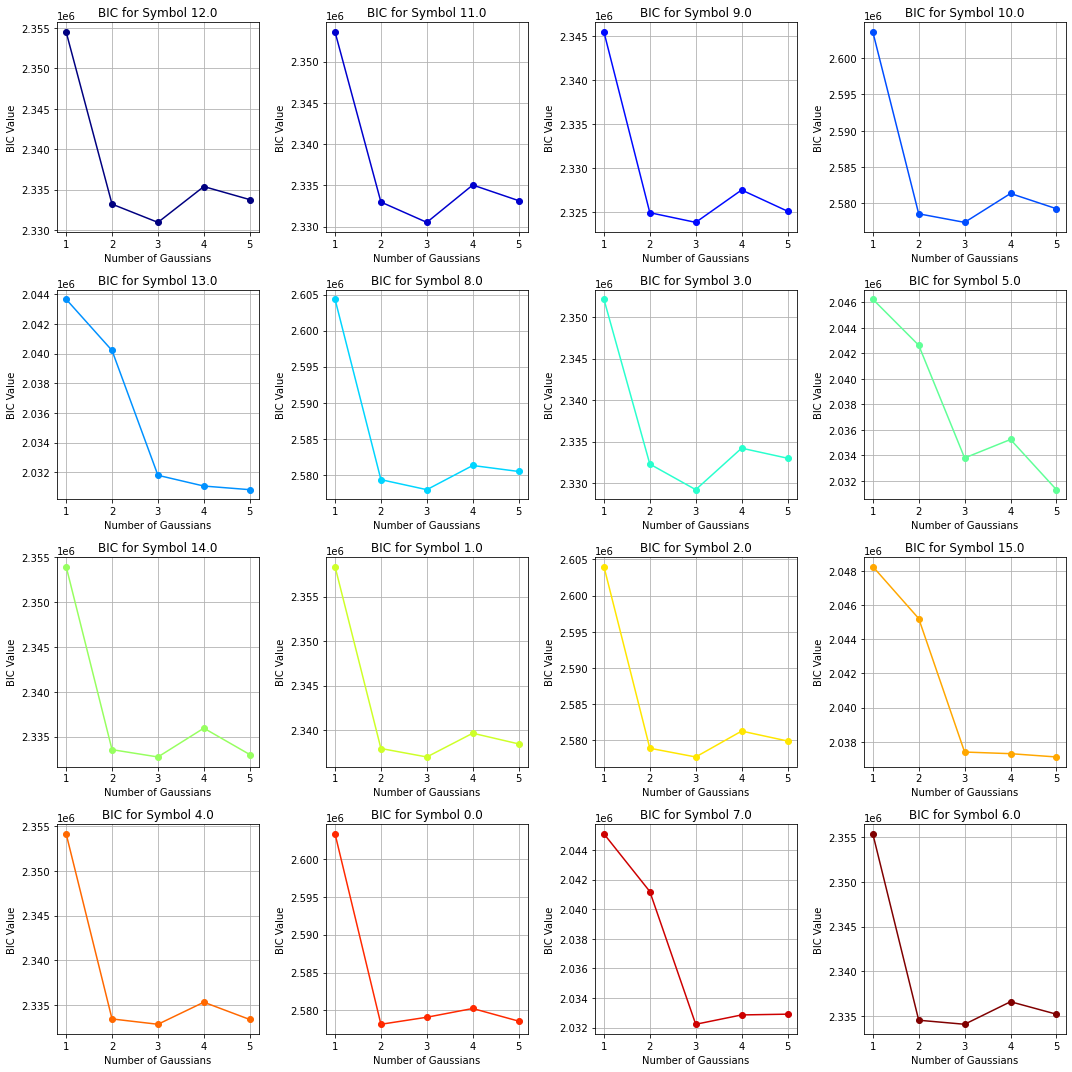

In [5]:

# Load data
df = load_data_from_folder("C:/Users/Prakruthi/Documents/Dissertation/DATASET/no_neighbors_datasets")

unique_labels = df['point_label'].unique()
data_colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

# Decide on grid size for subplots 
n_cols = 4 
n_rows = int(np.ceil(len(unique_labels) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for idx, label in enumerate(unique_labels):
    symbol_data = df[df['point_label'] == label][['point_x_shifted_real', 'point_x_shifted_imag']].values
    
    n_components = np.arange(1, 6)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(symbol_data)
              for n in n_components]
    bic = [model.bic(symbol_data) for model in models]
    
    # Plotting BIC values on individual subplots
    axes[idx].plot(n_components, bic, marker='o', linestyle='-', color=data_colors[idx])
    axes[idx].set_title(f'BIC for Symbol {label}')
    axes[idx].set_xlabel('Number of Gaussians')
    axes[idx].set_ylabel('BIC Value')
    axes[idx].grid(True)

# Remove any unused subplots
for idx in range(len(unique_labels), n_rows * n_cols):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

folder_path = "C:/Users/Prakruthi/Documents/Dissertation/DATASET/no_neighbors_datasets"
first_file = [f for f in os.listdir(folder_path) if f.endswith('.parquet')][0]
df = pd.read_parquet(os.path.join(folder_path, first_file))

#Train best GMM for each symbol
gmm_models = {}
unique_labels = df['point_label'].unique()

for label in unique_labels:
    symbol_data = df[df['point_label'] == label][['point_x_shifted_real', 'point_x_shifted_imag']].values
    n_components = np.arange(1, 6)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(symbol_data) for n in n_components]
    bic = [model.bic(symbol_data) for model in models]
    best_gmm = models[np.argmin(bic)]
    gmm_models[label] = best_gmm

#  Predict the symbols for received data points
predicted_labels = []

for index, row in df.iterrows():
    point = [[row['point_x_shifted_real'], row['point_x_shifted_imag']]]
    likelihoods = {label: gmm.score_samples(point) for label, gmm in gmm_models.items()}
    predicted_label = max(likelihoods, key=likelihoods.get)
    predicted_labels.append(predicted_label)

df['predicted_label'] = predicted_labels

print(df[['point_label', 'predicted_label']])


       point_label  predicted_label
0             12.0             12.0
1             12.0             12.0
2             11.0             11.0
3              9.0              9.0
4             11.0             11.0
...            ...              ...
65531          4.0              4.0
65532         10.0             10.0
65533          1.0              1.0
65534          1.0              1.0
65535         10.0             10.0

[65536 rows x 2 columns]


In [4]:
correct_predictions = df[df['point_label'] == df['predicted_label']].shape[0]
total_predictions = df.shape[0]
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.60%


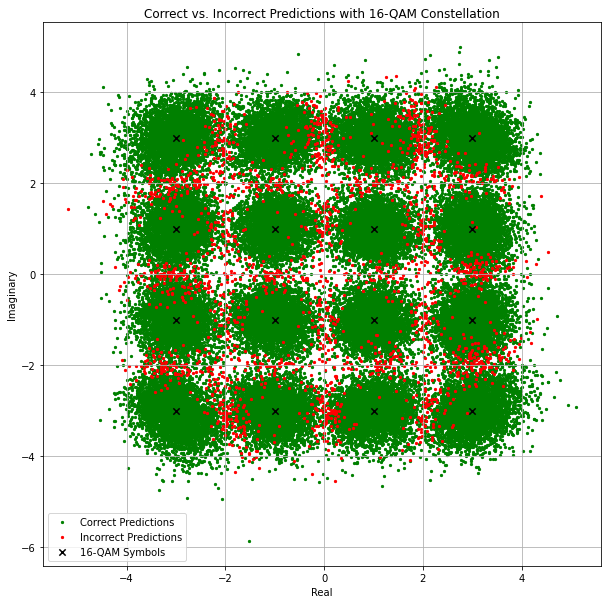

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#  function to generate 16-QAM constellation
def generate_16QAM_constellation():
    levels = [-3, -1, 1, 3]
    constellation = []
    for real_part in levels:
        for imag_part in levels:
            constellation.append((real_part, imag_part))
    return np.array(constellation)


# Filtering correct and incorrect predictions
correct = df[df['point_label'] == df['predicted_label']]
incorrect = df[df['point_label'] != df['predicted_label']]

# Generate 16-QAM constellation
qam_constellation = generate_16QAM_constellation()

# Plotting
plt.figure(figsize=(10, 10))

# Plot correct predictions in green
plt.scatter(correct['point_x_shifted_real'], correct['point_x_shifted_imag'], color='green', s=5, label='Correct Predictions')

# Plot incorrect predictions in red
plt.scatter(incorrect['point_x_shifted_real'], incorrect['point_x_shifted_imag'], color='red', s=5, label='Incorrect Predictions')

# Plot 16-QAM constellation
plt.scatter(qam_constellation[:, 0], qam_constellation[:, 1], color='black', s=40, marker='x', label='16-QAM Symbols')

# Adjusting plot details
plt.title('Correct vs. Incorrect Predictions with 16-QAM Constellation')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.show()
